![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

In [2]:
!pip install invertedai
%matplotlib widget
from IPython.display import clear_output
from invertedai import Jupyter_Render
import numpy as np
import cv2
import invertedai as iai
clear_output()

# Provide your API key

In [3]:
iai.add_apikey("")

# Setup

Set up the simulation by specifying the location and simulation lenght ( (1 step = 0.1 second))

In [4]:
location = "canada:vancouver:drake_street_and_pacific_blvd"
# location = "canada:vancouver:ubc_roundabout"

simulation_length = 30 

# Initialize local renderer

Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

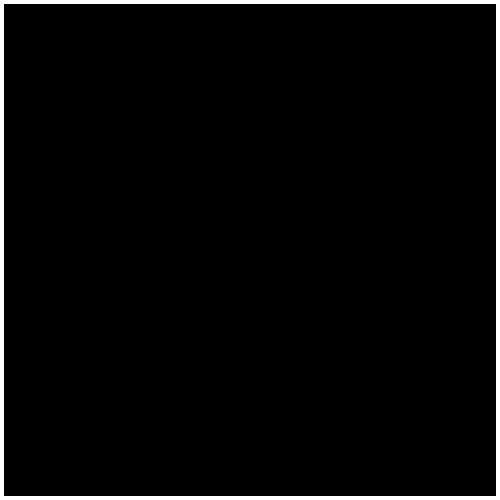

In [5]:
renderer = Jupyter_Render()
display(renderer)

# Preview the map location

In [6]:
location_info_response = iai.location_info(location=location)
rendered_map = location_info_response.birdview_image.decode()
renderer.add_frame(rendered_map)

# Get Traffic-light states

In [7]:
if any(actor.agent_type == "traffic-light" for actor in location_info_response.static_actors):
    scene_has_lights = True
    light_response = iai.light(location=location)
else:
    light_response = None
    scene_has_lights = False

# Initialize the simulation

In [8]:
response = iai.initialize(location, 
    traffic_light_state_history=[light_response.traffic_lights_states] if scene_has_lights else None,
    get_birdview = True,                                                         
    agent_count = 10,)
agent_attributes = response.agent_attributes
rendered_map = response.birdview.decode()
renderer.add_frame(rendered_map)

# Start the simulation
\* Returning the birdviews will casue a much longer response time than running without them.

In [8]:
frames = []
for t in range(simulation_length):
    light_response = iai.light(location=location, recurrent_states=light_response.recurrent_states) if scene_has_lights else None
    response = iai.drive(
        agent_attributes=agent_attributes,
        agent_states=response.agent_states,
        recurrent_states=response.recurrent_states,
        get_birdview=True,
        location=location,
        get_infractions=True,
        traffic_lights_states=light_response.traffic_lights_states if scene_has_lights else None,
    )
    image = response.birdview.decode()
    renderer.add_frame(image)

In [9]:
import numpy as np
img = np.zeros((512, 512, 3), dtype=np.uint8)
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 80]
_, encimg = cv2.imencode(".jpg", img.astype(np.uint8), encode_param)
img = encimg.tolist()

In [ ]:
#print(img)